In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
colors = cm.get_cmap("tab10")

# Riddler Classic

_Riddler League Baseball, also known as the RLB, consists of three teams: the Mississippi Moonwalkers, the Delaware Doubloons and the Tennessee Taters._

_Each time a batter for the Moonwalkers comes to the plate, they have a 40 percent chance of getting a walk and a 60 percent chance of striking out. Each batter for the Doubloons, meanwhile, hits a double 20 percent percent of the time, driving in any teammates who are on base, and strikes out the remaining 80 percent of the time. Finally, each batter for the Taters has a 10 percent chance of hitting a home run and a 90 percent chance of striking out._

_During the RLB season, each team plays an equal number of games against each opponent. Games are nine innings long and can go into extra innings just like in other baseball leagues. Which of the three teams is most likely to have the best record at the end of the season?_

We're going to do this in an OOP manner, so we'll first define the teams and game advancement as classes

## Define Game Sim

In [2]:
class Team:
    
    def __init__(self, name, action_dictionary, color):
        self.results = []
        self.scores = []
        # Action dictionary must have form {"name action": probability of action}
        self.action_dictionary = action_dictionary
        self.name = name
        self.opponent = []
        self.color = color

    def update(self, own_box_score, opponent_box_score, opponent_name):
        self.scores.append(sum(own_box_score))
        self.opponent.append(opponent_name)
        if sum(own_box_score) > sum(opponent_box_score):
            self.results.append(1)
        else:
            self.results.append(0)
            
    def finalize(self):
        self.np_scores = np.array(self.scores)
        self.np_opponent = np.array(self.opponent)
        self.np_results = np.array(self.results)
        self.scoring_total = self.np_scores.sum()
        self.scoring_mean = self.np_scores.mean()
        self.scoring_max = self.np_scores.max()
        self.scoring_std = self.np_scores.std()

In [3]:
moonwalkers_dict = {
    "walk" : 0.4,
    "strikeout" : 0.6
}
doubloons_dict = {
    "double" : 0.2,
    "strikeout" : 0.8
}
taters_dict = {
    "homerun" : 0.1,
    "strikeout" : 0.9
}
moonwalkers = Team("Moonwalkers", moonwalkers_dict, colors(0))
doubloons = Team("Doubloons",doubloons_dict, colors(1))
taters = Team("Taters", taters_dict, colors(2))

In [4]:
class Game:

    def __init__(self, home_team, away_team):
        self.away_box_score = []
        self.home_box_score = []
        self.home_team = home_team
        self.away_team = away_team

    def simulate(self):

        # simulate both away and home innings for 9 innings
        for inning in range(1,10):
            away_runs_scored = Inning().simulate(self.away_team.action_dictionary)
            home_runs_scored = Inning().simulate(self.home_team.action_dictionary)
            # Update the score
            self.away_box_score.append(away_runs_scored)
            self.home_box_score.append(home_runs_scored)

        # Keep going until there isn't a tie
        while sum(self.away_box_score) == sum(self.home_box_score):
            away_runs_scored = Inning().simulate(self.away_team.action_dictionary)
            home_runs_scored = Inning().simulate(self.home_team.action_dictionary)
            # Update the score
            self.away_box_score.append(away_runs_scored)
            self.home_box_score.append(home_runs_scored)


        self.home_team.update(self.home_box_score, self.away_box_score, self.away_team.name)
        self.away_team.update(self.away_box_score, self.home_box_score, self.home_team.name)

In [5]:
class Inning:

    def __init__(self):
        self.outs = 0
        self.runs_scored_inning = 0
        self.field = Field() # Start with a fresh field

    def simulate(self, actions_dict):
        # Run at bats until inning is over
        while self.outs < 3:
            # simulate at bat
            ab_result = AtBat(actions_dict)
            # issue result to Field
            runs_scored, outs_recorded = self.field.update(ab_result.outcome)
            self.outs += outs_recorded
            # bank runs if outs are still under 3
            if self.outs < 3:
                self.runs_scored_inning += runs_scored

        return self.runs_scored_inning


In [6]:
class AtBat:
    
    def __init__(self, actions_dict):
        value = random.random()

        # Take advantage of the fact each team has strikeout option
        if value > actions_dict["strikeout"]:
            for k,v in actions_dict.items():
                if k is not "strikeout": self.outcome = k
        else:
            self.outcome = "strikeout"


In [7]:
class Field:

    def __init__(self):
        """ fresh field """
        self.occupied_1b = False
        self.occupied_2b = False
        self.occupied_3b = False


    def update(self, result):
        """Updating the field based on results"""

        runs_scored = 0
        outs_recorded = 0

        if result == 'double':
            # Runners on 2b score
            if self.occupied_2b:
                runs_scored += 1
            self.occupied_2b = True
            
        if result == 'homerun':
            runs_scored += 1

        if result == 'strikeout':
            outs_recorded += 1

        if result == 'walk':
            if self.occupied_3b and self.occupied_2b and self.occupied_1b:
                runs_scored += 1
            if self.occupied_2b and self.occupied_1b:
                self.occupied_3b = True
            if self.occupied_1b:
                self.occupied_2b = True
            self.occupied_1b = True        

        return runs_scored, outs_recorded


Now we can go ahead and simulate a bunch of games...

## Simulation

In [8]:
games_played = 500000
for i in range(1,games_played):
    g = Game(moonwalkers, doubloons)
    g.simulate()
    g = Game(doubloons, taters)
    g.simulate()
    g = Game(taters, moonwalkers)
    g.simulate()

moonwalkers.finalize()
doubloons.finalize()
taters.finalize()

Look at the answer to the problem - which team has the best win record

## Solution

In [9]:
print( f"Moonwalkers Winning Percentage: {round(sum(moonwalkers.results) / float(len(moonwalkers.results)),3)}")
print( f"Taters Winning Percentage: {round(sum(taters.results) / float(len(taters.results)),3)}")
print( f"Doubloons Winning Percentage: {round(sum(doubloons.results) / float(len(doubloons.results)),3)}")

Moonwalkers Winning Percentage: 0.534
Taters Winning Percentage: 0.573
Doubloons Winning Percentage: 0.393


Looks like the answer is that the **Tennessee Taters** have the best win record with 0.573. Next best is the Moonwalkers at .534, and the doubloons come in worst at 0.393

## Visualization

Let's also visualize the scoring and winning percentage of each team

First we'll start with the scoring distributions

In [10]:
def team_score_hist(team, color,name):
    bins = np.arange(0, max(team.scores),1)
    plt.hist(team.scores, bins=bins, color=color, histtype="step",linewidth=3, label=name)

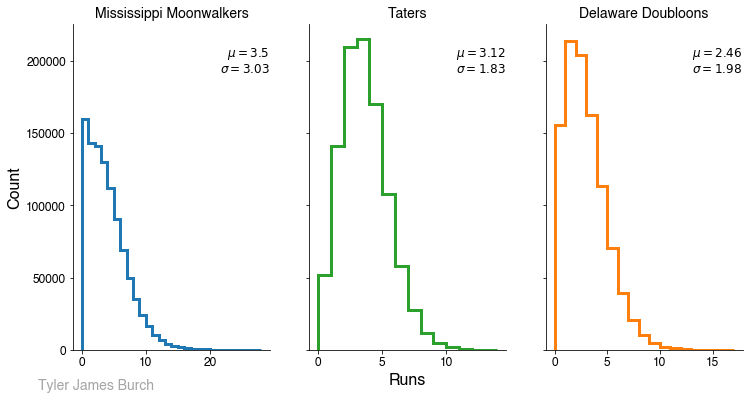

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(12,6))
# Draw histograms
plt.sca(ax[0])
plt.ylabel("Count",fontsize=16)
team_score_hist(moonwalkers, moonwalkers.color,"Moonwalkers")
plt.annotate(f"$\mu = {round(moonwalkers.scoring_mean,2)}$",
             xy=(1,0.9), xycoords="axes fraction", 
             ha="right", fontsize=12)
plt.annotate(f"$\sigma = {round(moonwalkers.scoring_std,2)}$",
             xy=(1,0.85), xycoords="axes fraction", 
             ha="right", fontsize=12)
ax[0].set_title("Mississippi Moonwalkers",fontsize=14)


plt.sca(ax[1])
plt.xlabel("Runs",fontsize=16)
team_score_hist(taters, taters.color,"Tennessee Taters")
plt.annotate(f"$\mu = {round(taters.scoring_mean,2)}$",
             xy=(1,0.9), xycoords="axes fraction", 
             ha="right", fontsize=12)
plt.annotate(f"$\sigma = {round(taters.scoring_std,2)}$",
             xy=(1,0.85), xycoords="axes fraction", 
             ha="right", fontsize=12)
ax[1].set_title("Taters",fontsize=14)

plt.sca(ax[2])
team_score_hist(doubloons,doubloons.color, "Delaware Doubloons")
plt.annotate(f"$\mu = {round(doubloons.scoring_mean,2)}$",
             xy=(1,0.9), xycoords="axes fraction", 
             ha="right", fontsize=12)
plt.annotate(f"$\sigma = {round(doubloons.scoring_std,2)}$",
             xy=(1,0.85), xycoords="axes fraction", 
             ha="right", fontsize=12)
ax[2].set_title("Delaware Doubloons",fontsize=14)

sns.despine()
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=12)

plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)    
    
_ = plt.savefig("../plots/scoring_multiplot.png")

Looks like the best scoring _on average_ is the Moonwalkers, but they also have the widest spread, where the Taters have a slightly lower mean, but a much smaller deviation.

We can also draw these overlapping for better comparison

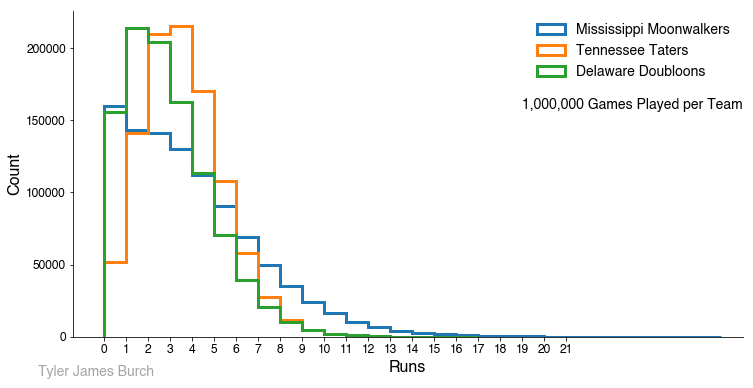

In [12]:
fig = plt.figure(figsize=(12,6))
team_score_hist(moonwalkers,colors(0),"Mississippi Moonwalkers")
team_score_hist(taters,colors(1),"Tennessee Taters")
team_score_hist(doubloons,colors(2), "Delaware Doubloons")
sns.despine()
plt.legend(frameon=False,fontsize=14)
plt.xticks(np.arange(0, 22,1))
plt.xlim(right=max(moonwalkers.scores))
plt.xlabel("Runs",fontsize=16)
plt.ylabel("Count",fontsize=16)
fig.gca().tick_params(axis='both', which='major', labelsize=12)

plt.annotate(f"{games_played*2:,} Games Played per Team",
             xy=(1,0.7), xycoords="axes fraction", 
             ha="right", fontsize=14)
plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)
_ = plt.savefig("../plots/scoring_overlay.png")

Another interesting plot is the winning percentage as more games are played

In [13]:
def win_percent(team):
    t_cumsum = team.np_results.cumsum()
    t_games_played = np.ones(len(t_cumsum)).cumsum()
    win_percentage = t_cumsum / t_games_played
    return win_percentage

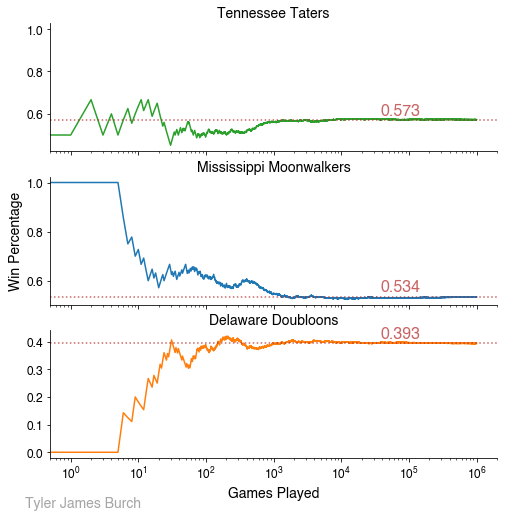

In [14]:
def draw_stability_line(win_percentage):
    ax = plt.gca()
    ax.axhline(win_percentage[-1],linestyle=":",color="firebrick",alpha=0.7)
    plt.annotate(round(win_percentage[-1],3),
        xy=(150000,win_percentage[-1]+.01), xycoords="data", 
        ha="right", va="bottom", color="firebrick",alpha=0.7, fontsize=16)

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(8,8), sharex=True)



plt.sca(ax[0])
wp_taters = win_percent(taters)
plt.plot(wp_taters, color=taters.color)
plt.title("Tennessee Taters",fontsize=14)
draw_stability_line(wp_taters)


plt.sca(ax[1])
wp_moonwalkers = win_percent(moonwalkers)
plt.plot(wp_moonwalkers, color=moonwalkers.color)
plt.ylabel("Win Percentage", fontsize=14)
plt.title("Mississippi Moonwalkers",fontsize=14)
draw_stability_line(wp_moonwalkers)


plt.sca(ax[2])
wp_doubloons = win_percent(doubloons)
plt.plot(wp_doubloons,color=doubloons.color)
plt.xlabel("Games Played",fontsize=14)
plt.title("Delaware Doubloons",fontsize=14)
draw_stability_line(wp_doubloons)


sns.despine()
for a in ax:
    a.set_xscale('log')
    a.tick_params(axis='both', which='major', labelsize=12)
    
plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
         textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)    
_ = plt.savefig("../plots/winning_percentage.png")

One last fun check would be to look at the win percentage team-vs-team

In [15]:
def head_to_head_plot(team1, team2):
    t1_matchups = team1.np_results[team1.np_opponent==team2.name]
    t1_cumsum = t1_matchups.cumsum()
    t1_games_played = np.ones(len(t1_matchups)).cumsum()
    t1_relative_wp = t1_cumsum / t1_games_played

    t1_loss_replaced = t1_matchups.copy()
    t1_loss_replaced[t1_loss_replaced==0] = -1
    t1_WL = t1_loss_replaced.cumsum()
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(t1_relative_wp)
    
    #spine placement data centered
    ax = plt.gca()
    ax.set_xscale('log')

    ax.spines['bottom'].set_position(('data', 0.5))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    #plt.xticks(np.linspace(30000, 150000,7))
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.xlabel("Games\nPlayed",fontsize=14, ha="right",va="center")

    ax.xaxis.set_label_coords(1.125,0.5)

    plt.ylabel("Win Percentage", fontsize=14)
    plt.ylim(bottom=0, top=1)

    plt.figtext(.5,.80,f"{team1.name} Win Percentage", fontsize=20,ha="center")
    plt.figtext(.5,.75,f"head-to-head vs. {team2.name} ", fontsize=14, ha='center')
    
    # Label stable value
    ax.axhline(t1_relative_wp[-1],linestyle=":",color="firebrick",alpha=0.7)
    plt.annotate(round(t1_relative_wp[-1],3),
             xy=(150000,t1_relative_wp[-1]+.01), xycoords="data", 
             ha="right", va="bottom", color="firebrick",alpha=0.7, fontsize=16)
    
    plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)

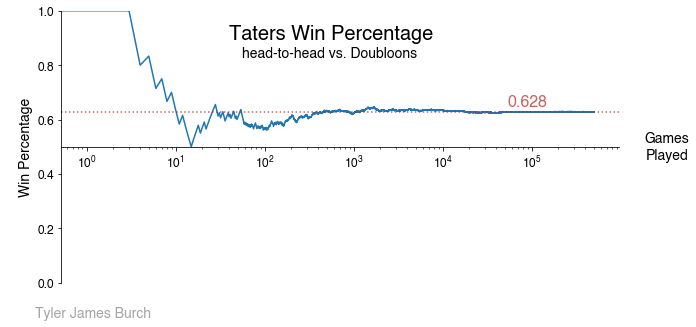

In [16]:
head_to_head_plot(taters, doubloons)
_ = plt.savefig("../plots/td_relative.png")

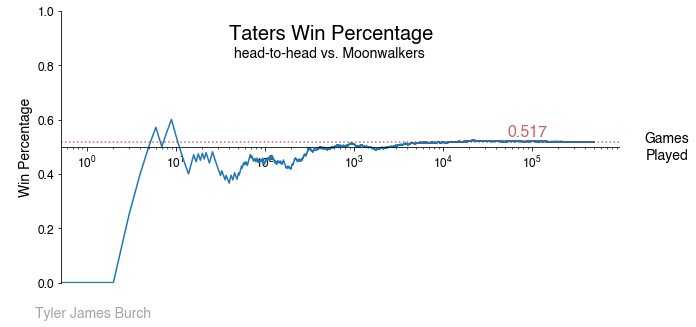

In [17]:
head_to_head_plot(taters, moonwalkers)
_ = plt.savefig("../plots/tm_relative.png")

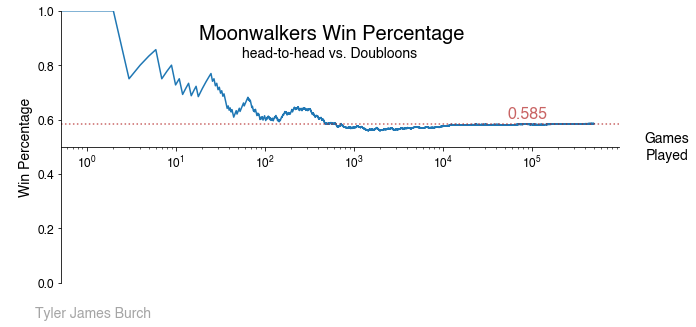

In [18]:
head_to_head_plot(moonwalkers,doubloons)
_ = plt.savefig("../plots/md_relative.png")

And similarly, (1-WP) for any of these plots depicts the inverse winning percentage